<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_299799658_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.005)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 299799658
period = 4.11486103601241  # Orbital period in days
epoch = 1325.43658460982
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.2]
folded_lc = folded_lc[folded_lc.time > -0.2]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_299799658_all_sector_lightcurve.csv


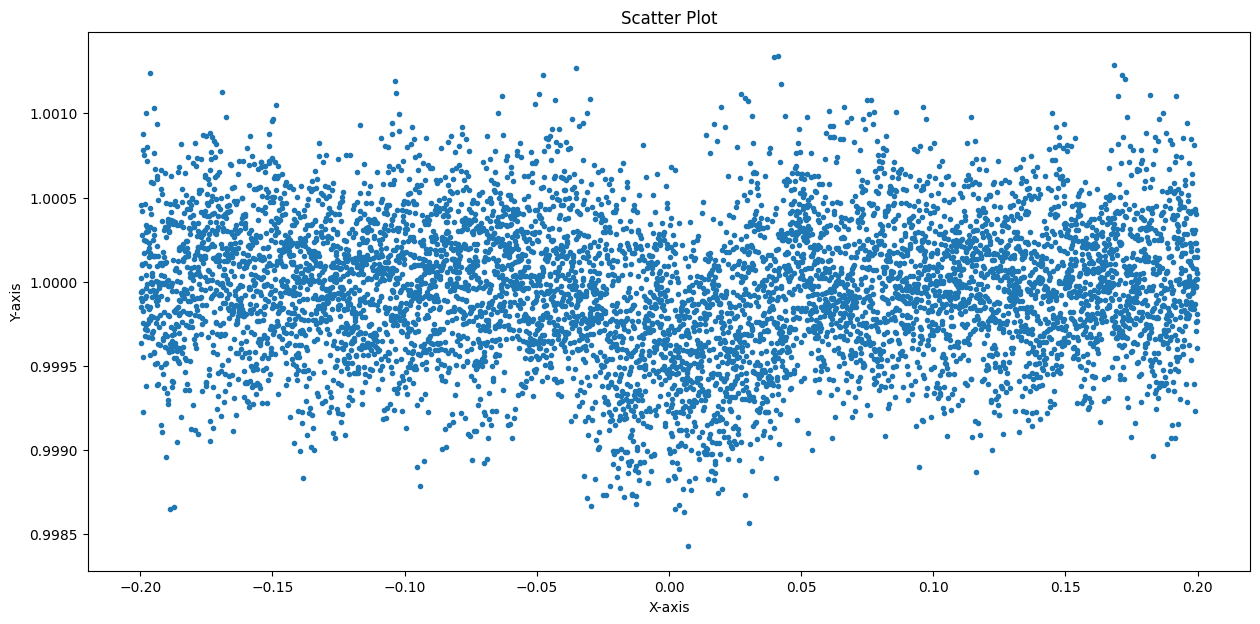

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [6]:
ID = tic_id
sectors = np.array([1, 13, 27, 28])
target = tr.target(ID=ID, sectors=sectors, search_radius=7) # target radius shorted

<ipython-input-7-41aedc5e29d4>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_1, ap_13, ap_27, ap_28])


Sector 1


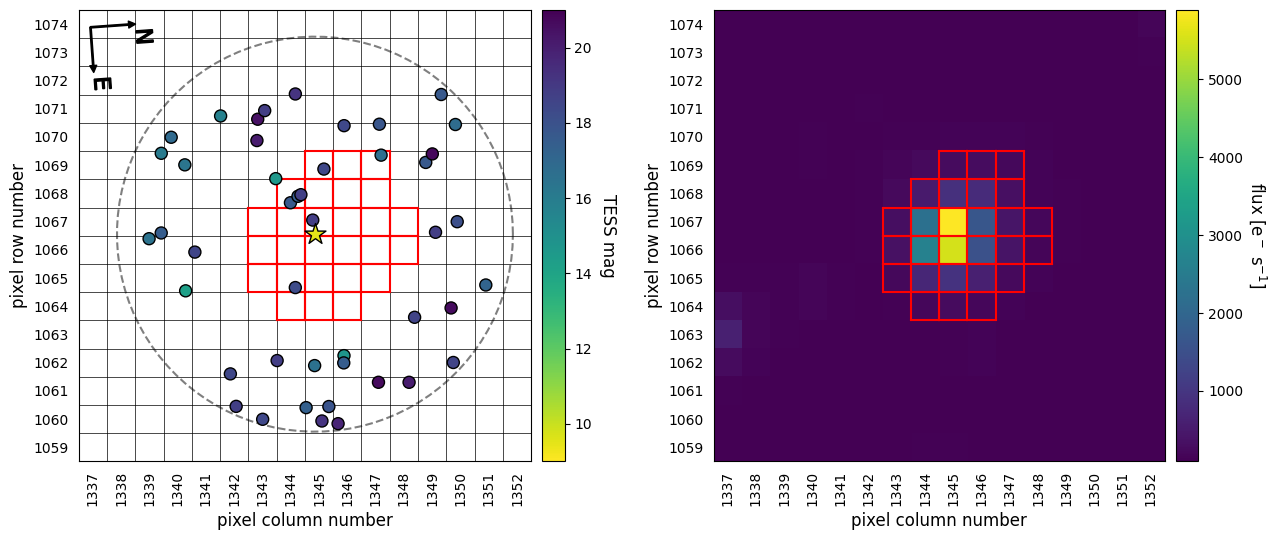

Sector 13


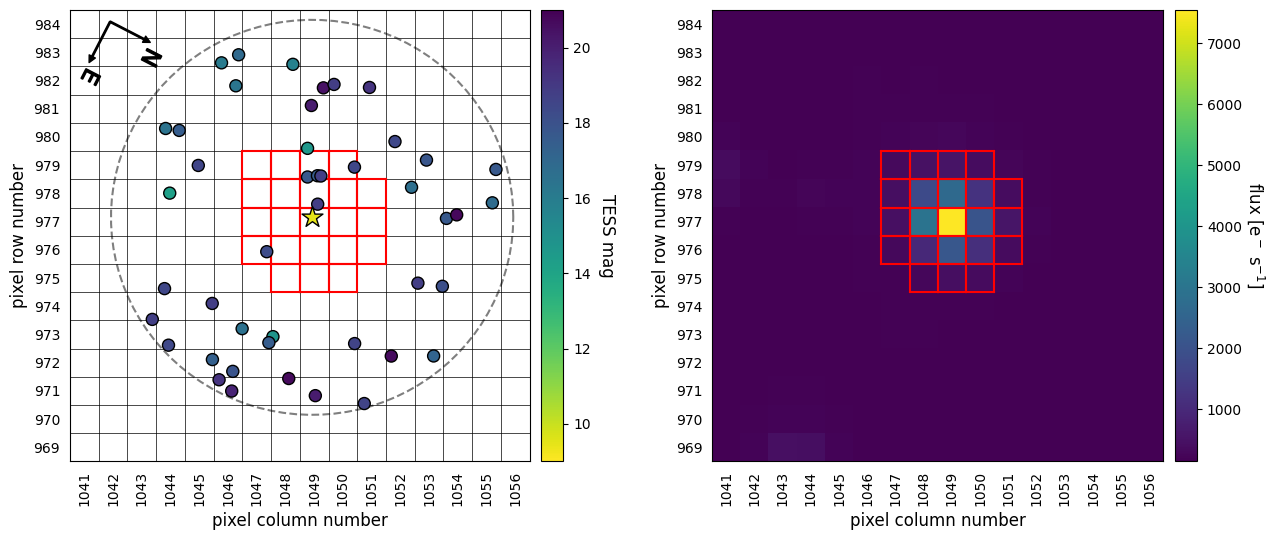

Sector 27


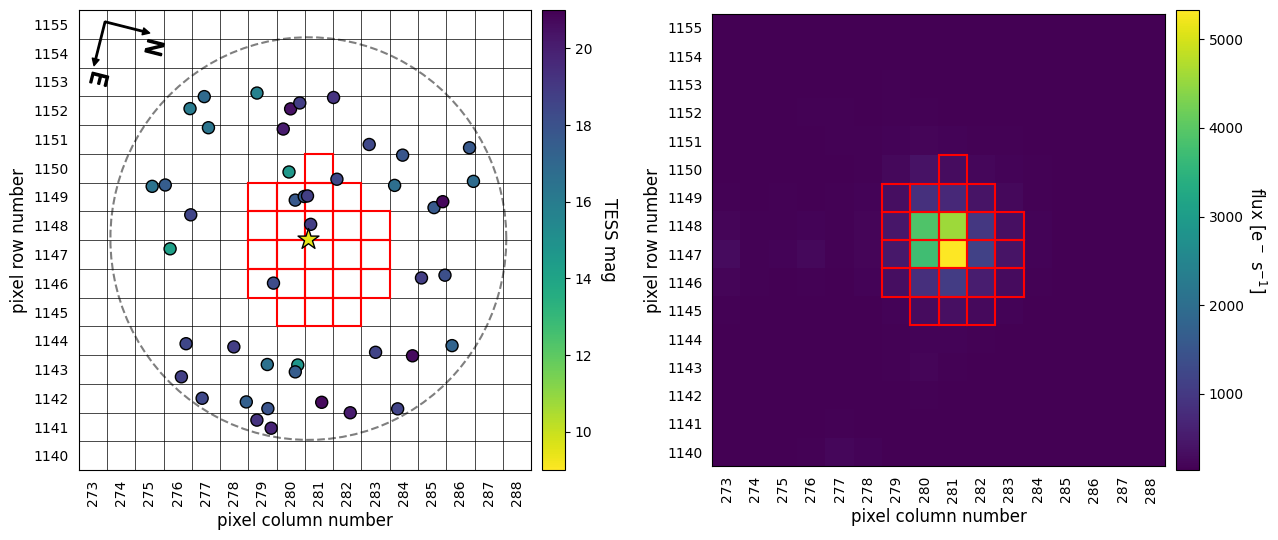

Sector 28


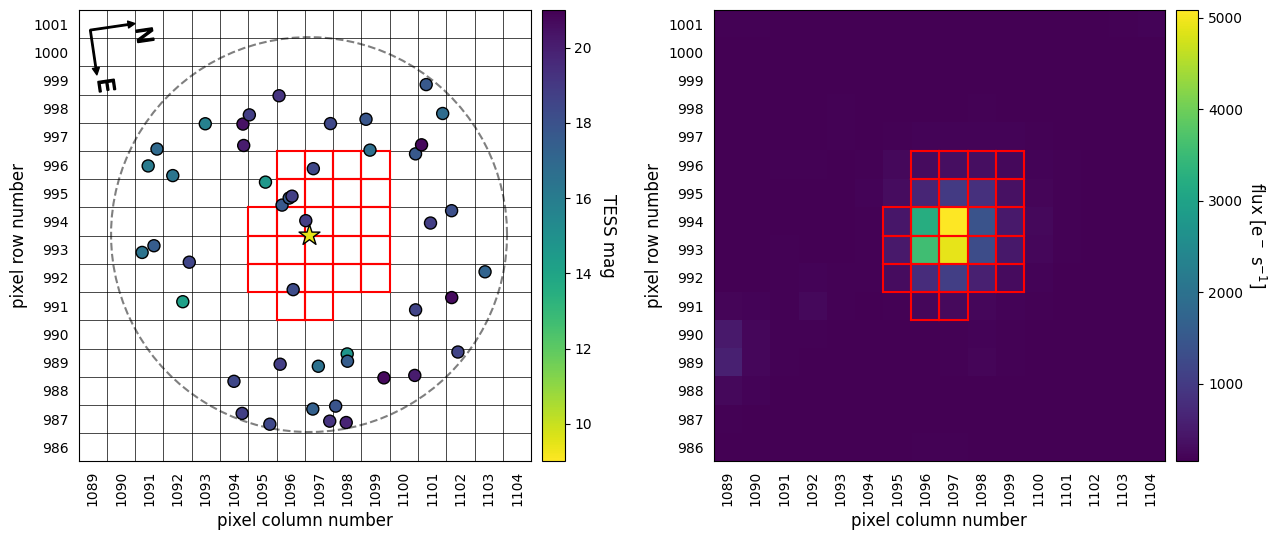

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,299799658,9.4780,8.777,8.409,8.296,38.118730,-78.023815,0.890000,0.887336,5232.0,12.140500,0.000,0.000
1,630780115,18.8400,NaN,NaN,NaN,38.104758,-78.024053,NaN,NaN,NaN,0.786500,10.472,265.294
2,630780113,17.6922,NaN,NaN,NaN,38.085841,-78.028329,0.930000,0.582500,5384.0,0.287384,29.452,236.500
3,299799661,17.5402,15.741,15.193,14.987,38.080202,-78.026705,0.218808,0.248101,3264.0,NaN,30.601,250.105
4,630780114,18.7903,NaN,NaN,NaN,38.078877,-78.026086,NaN,NaN,NaN,0.635397,30.870,254.626
5,299799664,18.2651,16.114,15.757,15.553,38.169294,-78.028574,NaN,NaN,3631.0,1.558150,41.469,114.425
6,630780140,18.4235,NaN,NaN,NaN,38.055845,-78.021031,0.620000,0.782497,3970.0,0.011106,48.038,282.011
7,299799665,14.5938,13.891,13.508,13.452,38.060951,-78.030957,0.960000,1.138590,5469.0,0.845962,50.228,239.185
8,299799655,16.6756,15.573,15.034,14.975,38.047293,-78.009204,0.750000,0.669546,4702.0,0.745156,74.952,314.533
9,630780112,20.0709,NaN,NaN,NaN,38.021987,-78.034216,NaN,NaN,NaN,0.654282,81.365,242.553


In [7]:
ap_1 = np.array([[1343.0, 1065.0], [1343.0, 1066.0], [1343.0, 1067.0], [1344.0, 1064.0],
      [1344.0, 1065.0], [1344.0, 1066.0], [1344.0, 1067.0], [1344.0, 1068.0], [1345.0,
        1064.0], [1345.0, 1065.0], [1345.0, 1066.0], [1345.0, 1067.0], [1345.0, 1068.0],
      [1345.0, 1069.0], [1346.0, 1064.0], [1346.0, 1065.0], [1346.0, 1066.0], [1346.0,
        1067.0], [1346.0, 1068.0], [1346.0, 1069.0], [1347.0, 1065.0], [1347.0, 1066.0],
      [1347.0, 1067.0], [1347.0, 1068.0], [1347.0, 1069.0], [1348.0, 1066.0], [1348.0,
        1067.0]])
ap_13 = np.array([[1047.0, 976.0], [1047.0, 977.0], [1047.0, 978.0], [1047.0,
        979.0], [1048.0, 975.0], [1048.0, 976.0], [1048.0, 977.0], [1048.0, 978.0],
      [1048.0, 979.0], [1049.0, 975.0], [1049.0, 976.0], [1049.0, 977.0], [1049.0,
        978.0], [1049.0, 979.0], [1050.0, 975.0], [1050.0, 976.0], [1050.0, 977.0],
      [1050.0, 978.0], [1050.0, 979.0], [1051.0, 976.0], [1051.0, 977.0], [1051.0,
        978.0]])
ap_27 = np.array([[279.0, 1146.0], [279.0, 1147.0], [279.0, 1148.0], [279.0, 1149.0],
      [280.0, 1145.0], [280.0, 1146.0], [280.0, 1147.0], [280.0, 1148.0], [280.0,
        1149.0], [281.0, 1145.0], [281.0, 1146.0], [281.0, 1147.0], [281.0, 1148.0],
      [281.0, 1149.0], [281.0, 1150.0], [282.0, 1145.0], [282.0, 1146.0], [282.0,
        1147.0], [282.0, 1148.0], [282.0, 1149.0], [283.0, 1146.0], [283.0, 1147.0],
      [283.0, 1148.0]])
ap_28 = np.array([[1095.0, 992.0], [1095.0, 993.0], [1095.0, 994.0], [
        1096.0, 991.0], [1096.0, 992.0], [1096.0, 993.0], [1096.0, 994.0], [1096.0,
        995.0], [1096.0, 996.0], [1097.0, 991.0], [1097.0, 992.0], [1097.0, 993.0],
      [1097.0, 994.0], [1097.0, 995.0], [1097.0, 996.0], [1098.0, 992.0], [1098.0,
        993.0], [1098.0, 994.0], [1098.0, 995.0], [1098.0, 996.0], [1099.0, 992.0],
      [1099.0, 993.0], [1099.0, 994.0], [1099.0, 995.0], [1099.0, 996.0]])

apertures = np.array([ap_1, ap_13, ap_27, ap_28])

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [8]:
tdepth = 0.235 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,299799658,9.4780,8.777,8.409,8.296,38.118730,-78.023815,0.890000,0.887336,5232.0,12.140500,0.000,0.000,9.944037e-01,0.000236
1,630780115,18.8400,NaN,NaN,NaN,38.104758,-78.024053,NaN,NaN,NaN,0.786500,10.472,265.294,1.766018e-04,0.000000
2,630780113,17.6922,NaN,NaN,NaN,38.085841,-78.028329,0.930000,0.582500,5384.0,0.287384,29.452,236.500,4.203563e-04,0.559050
3,299799661,17.5402,15.741,15.193,14.987,38.080202,-78.026705,0.218808,0.248101,3264.0,NaN,30.601,250.105,4.873875e-04,0.482163
4,630780114,18.7903,NaN,NaN,NaN,38.078877,-78.026086,NaN,NaN,NaN,0.635397,30.870,254.626,1.556547e-04,0.000000
5,299799664,18.2651,16.114,15.757,15.553,38.169294,-78.028574,NaN,NaN,3631.0,1.558150,41.469,114.425,2.432586e-04,0.966050
6,630780140,18.4235,NaN,NaN,NaN,38.055845,-78.021031,0.620000,0.782497,3970.0,0.011106,48.038,282.011,1.692380e-04,0.000000
7,299799665,14.5938,13.891,13.508,13.452,38.060951,-78.030957,0.960000,1.138590,5469.0,0.845962,50.228,239.185,3.352795e-03,0.070091
8,299799655,16.6756,15.573,15.034,14.975,38.047293,-78.009204,0.750000,0.669546,4702.0,0.745156,74.952,314.533,3.077507e-04,0.763605
9,630780112,20.0709,NaN,NaN,NaN,38.021987,-78.034216,NaN,NaN,NaN,0.654282,81.365,242.553,1.057179e-06,0.000000


In [9]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 299799658.
Calculating EB and EBx2P scenario probabilities for 299799658.
Calculating PTP scenario probability for 299799658.
Calculating PEB and PEBx2P scenario probabilities for 299799658.
Calculating STP scenario probability for 299799658.
Calculating SEB and SEBx2P scenario probabilities for 299799658.
Calculating DTP scenario probability for 299799658.
Calculating DEB and DEBx2P scenario probabilities for 299799658.
Calculating BTP scenario probability for 299799658.
Calculating BEB and BEBx2P scenario probabilities for 299799658.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 630780113.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 299799661.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 299799664.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 299799665.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 299799655.
CPU times: user 4min 46s, sys: 6.04 s, total: 4min 52s
Wall t

In [10]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.20151986
NFPP = 0.00735077


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,299799658,TP,0.890000,0.887336,4.114861,86.949124,0.467749,0.538683,185.739725,2.073473,0.000000,0.000000,5.543744e-01
1,299799658,EB,0.890000,0.887336,4.114861,82.043822,1.898647,0.071242,45.334208,0.000000,0.792847,0.820263,1.698021e-30
2,299799658,EBx2P,0.890000,0.887336,8.229722,86.653279,1.179284,0.492197,195.050191,0.000000,0.850046,0.877458,2.786300e-13
3,299799658,PTP,0.890000,0.887336,4.114861,86.630009,0.542073,0.666998,206.232748,2.297601,0.000000,0.000000,1.375135e-01
4,299799658,PEB,0.890000,0.887336,4.114861,81.839722,1.858429,0.116792,56.232893,0.000000,0.819856,0.846246,2.009224e-34
5,299799658,PEBx2P,0.890000,0.887336,8.229722,86.978244,0.811607,0.630060,188.077542,0.000000,0.854348,0.882171,2.328811e-07
6,299799658,STP,0.851003,0.878499,4.114861,85.439719,0.857855,0.737906,223.495249,2.764871,0.000000,0.000000,1.306966e-01
7,299799658,SEB,0.117210,0.143382,4.114861,88.722950,0.128824,0.898565,156.879849,0.000000,0.039171,0.100000,3.010463e-05
8,299799658,SEBx2P,0.304444,0.321643,8.229722,88.179921,1.455545,0.559323,215.252592,0.000000,0.302785,0.320233,2.247193e-05
9,299799658,DTP,0.890000,0.887336,4.114861,85.467702,0.920929,0.714906,225.347317,1.875046,0.000000,0.000000,1.065923e-01


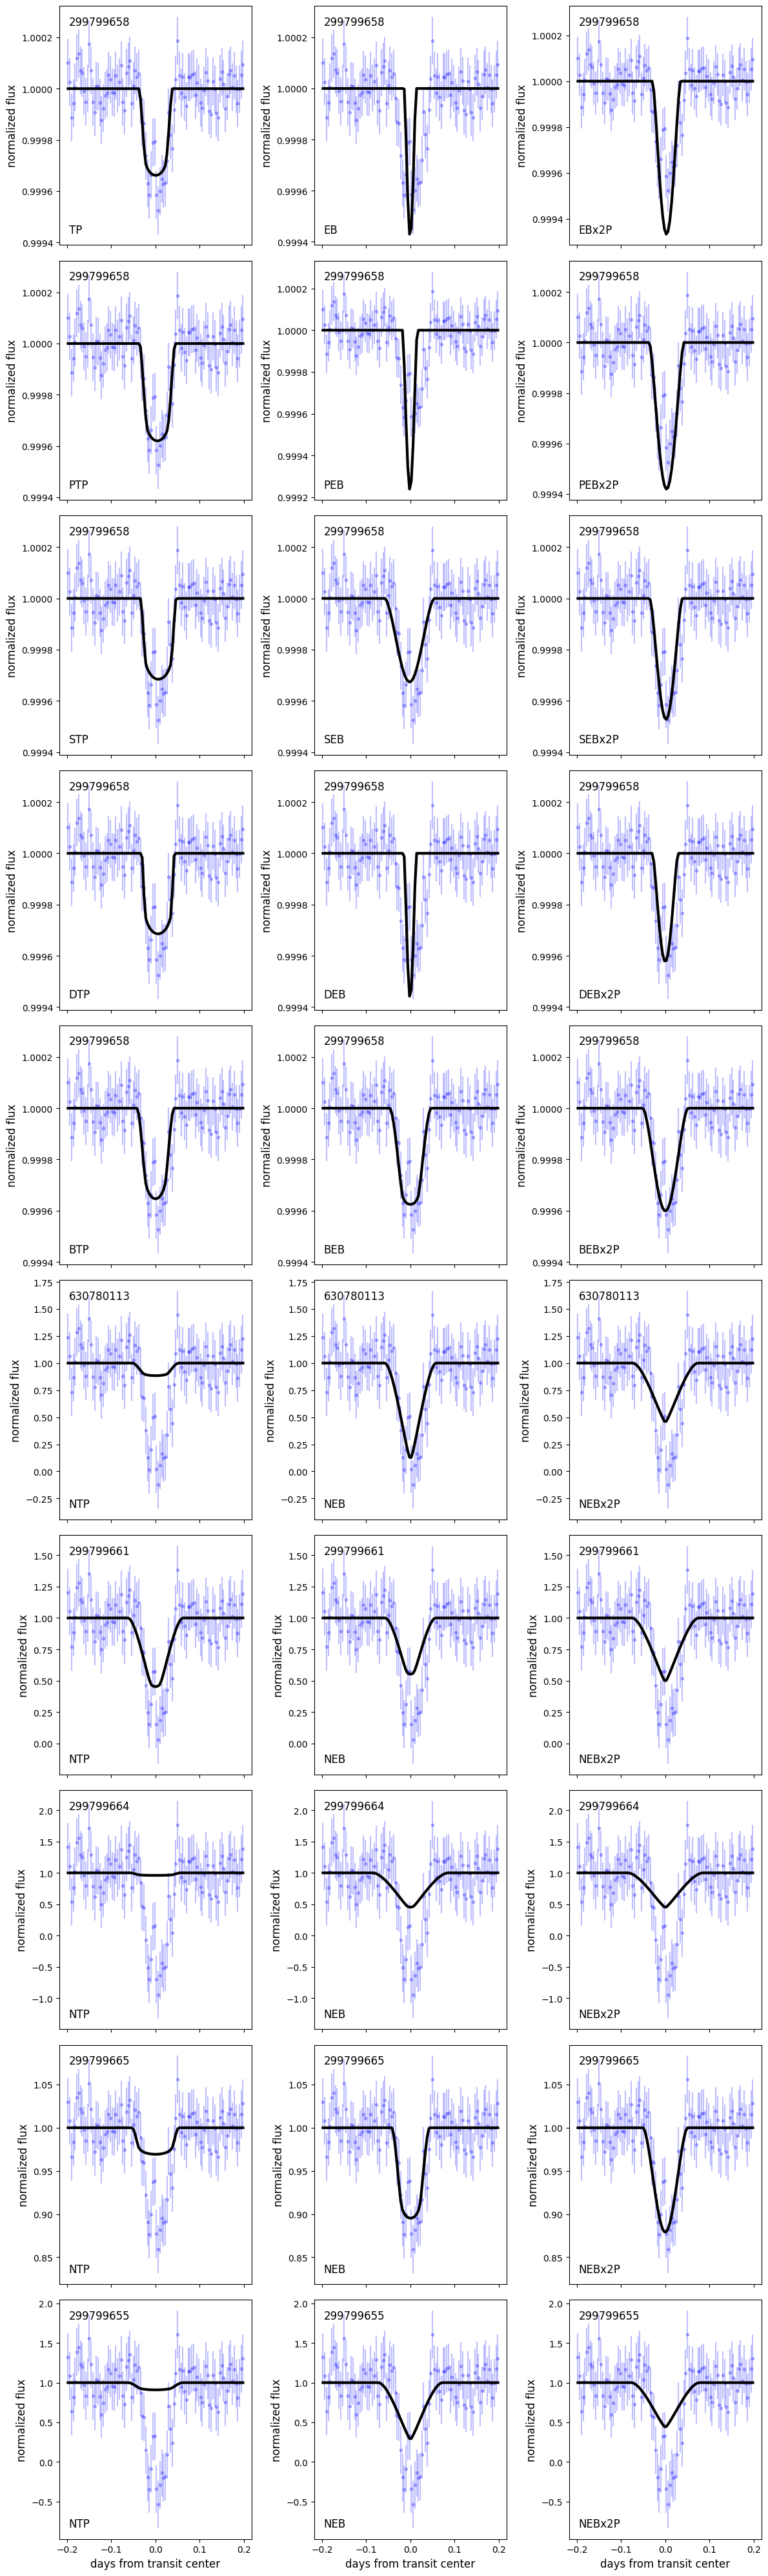

In [11]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [12]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.19209195431074197 +/- 0.01468486442250302
NFPP = 0.007930352758661958 +/- 0.0005604148322572708
CPU times: user 1h 29min 28s, sys: 1min 37s, total: 1h 31min 5s
Wall time: 1h 7min 14s


Our final conclusion about this specified planet of TIC 299799658 is that it is most likely a planet (according to the range of FPP and NFPP set by TRICERATOPS).